Notebook to explore remote sensing indexes to coorespond with aquatic vs PCO2. Continued from join_aleb_greenness.ipynb

In [41]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from shapely.geometry import box

from land_cover.load import loadKurek, plot_dir, loadGreenness, kurek_bounds, aleb_landcover_greenness_spatial
from land_cover.distance import calcMeanBoundDist
from land_cover.plotting import add_corr_line, add_r2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load merged dataset
gdf = gpd.read_file(aleb_landcover_greenness_spatial)

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Lake                       465 non-null    int64   
 1   index_right                324 non-null    float64 
 2   OBJECTID                   324 non-null    float64 
 3   Lake_id                    324 non-null    float64 
 4   Area_bound                 324 non-null    float64 
 5   Area_PW                    324 non-null    float64 
 6   Continent                  324 non-null    object  
 7   Lat                        324 non-null    float64 
 8   Lon                        324 non-null    float64 
 9   GFed_flag                  324 non-null    float64 
 10  PFed_flag                  324 non-null    float64 
 11  Endo_flag                  324 non-null    float64 
 12  Rser_flag                  324 non-null    float64 
 13  Shape_Leng                 

# Data explore

## Add metrics

In [4]:
gdf.AvgOfpCO2

0       3013.792349
1       1127.437636
2      10676.132743
3       1136.683363
4       3168.680857
           ...     
460     1108.968873
461      915.650820
462     1208.890622
463      691.037341
464      863.796677
Name: AvgOfpCO2, Length: 465, dtype: float64

In [5]:
# Figure out col names and indeces
pd.DataFrame(gdf.columns)
print([(i, name) for i, name in enumerate(gdf.columns.values)])

[(0, 'Lake'), (1, 'index_right'), (2, 'OBJECTID'), (3, 'Lake_id'), (4, 'Area_bound'), (5, 'Area_PW'), (6, 'Continent'), (7, 'Lat'), (8, 'Lon'), (9, 'GFed_flag'), (10, 'PFed_flag'), (11, 'Endo_flag'), (12, 'Rser_flag'), (13, 'Shape_Leng'), (14, 'Shape_Area'), (15, 'MA_p1'), (16, 'MA_p2'), (17, 'MA_p3'), (18, 'LEV_p3'), (19, 'LEV_p1'), (20, 'LEV_p1p3in'), (21, 'Hylak_id'), (22, 'green_sen_slope'), (23, 'green_mann_kendall_trend'), (24, 'green_trend_significance'), (25, 'green_b2_mean'), (26, 'green_b2_stddev'), (27, 'Lat_DD'), (28, 'Lon_DD'), (29, 'AvgOfTempC'), (30, 'AvgOfpH'), (31, 'AvgOfALKum'), (32, 'AvgOfpCO2'), (33, 'StDevOfpCO'), (34, 'Name'), (35, 'Reference'), (36, 'mean_bound'), (37, 'max_bound_'), (38, 'Area_m2'), (39, 'Perim_m2'), (40, 'Total_inun_2014'), (41, 'Trees_pct_2014'), (42, 'Shrubs_pct_2014'), (43, 'Wetlands_pct_2014'), (44, 'Graminoid_pct_2014'), (45, 'Sparse_pct_2014'), (46, 'Littorals_pct_2014'), (47, 'Littoral_wetland_pct_2014'), (48, 'Total_inun_RSD'), (49, 'To

In [11]:
# Sort covariates by analysis type
pco2_names = ["AvgOfALKum", "AvgOfpCO2"]
physical_names = [col for col in gdf.columns[36:42] if pd.api.types.is_float_dtype(gdf[col])]
physical_names = physical_names + ["Lat_DD", "Lon_DD"]
greenness_names = [col for col in gdf.columns[18:27] if pd.api.types.is_float_dtype(gdf[col])]

print(pco2_names, "\n", physical_names, "\n", greenness_names)
# TODO: add landcover

['AvgOfALKum', 'AvgOfpCO2'] 
 ['mean_bound', 'max_bound_', 'Area_m2', 'Perim_m2', 'Total_inun_2014', 'Trees_pct_2014', 'Lat_DD', 'Lon_DD'] 
 ['LEV_p3', 'LEV_p1', 'LEV_p1p3in', 'Hylak_id', 'green_sen_slope', 'green_trend_significance', 'green_b2_mean', 'green_b2_stddev']


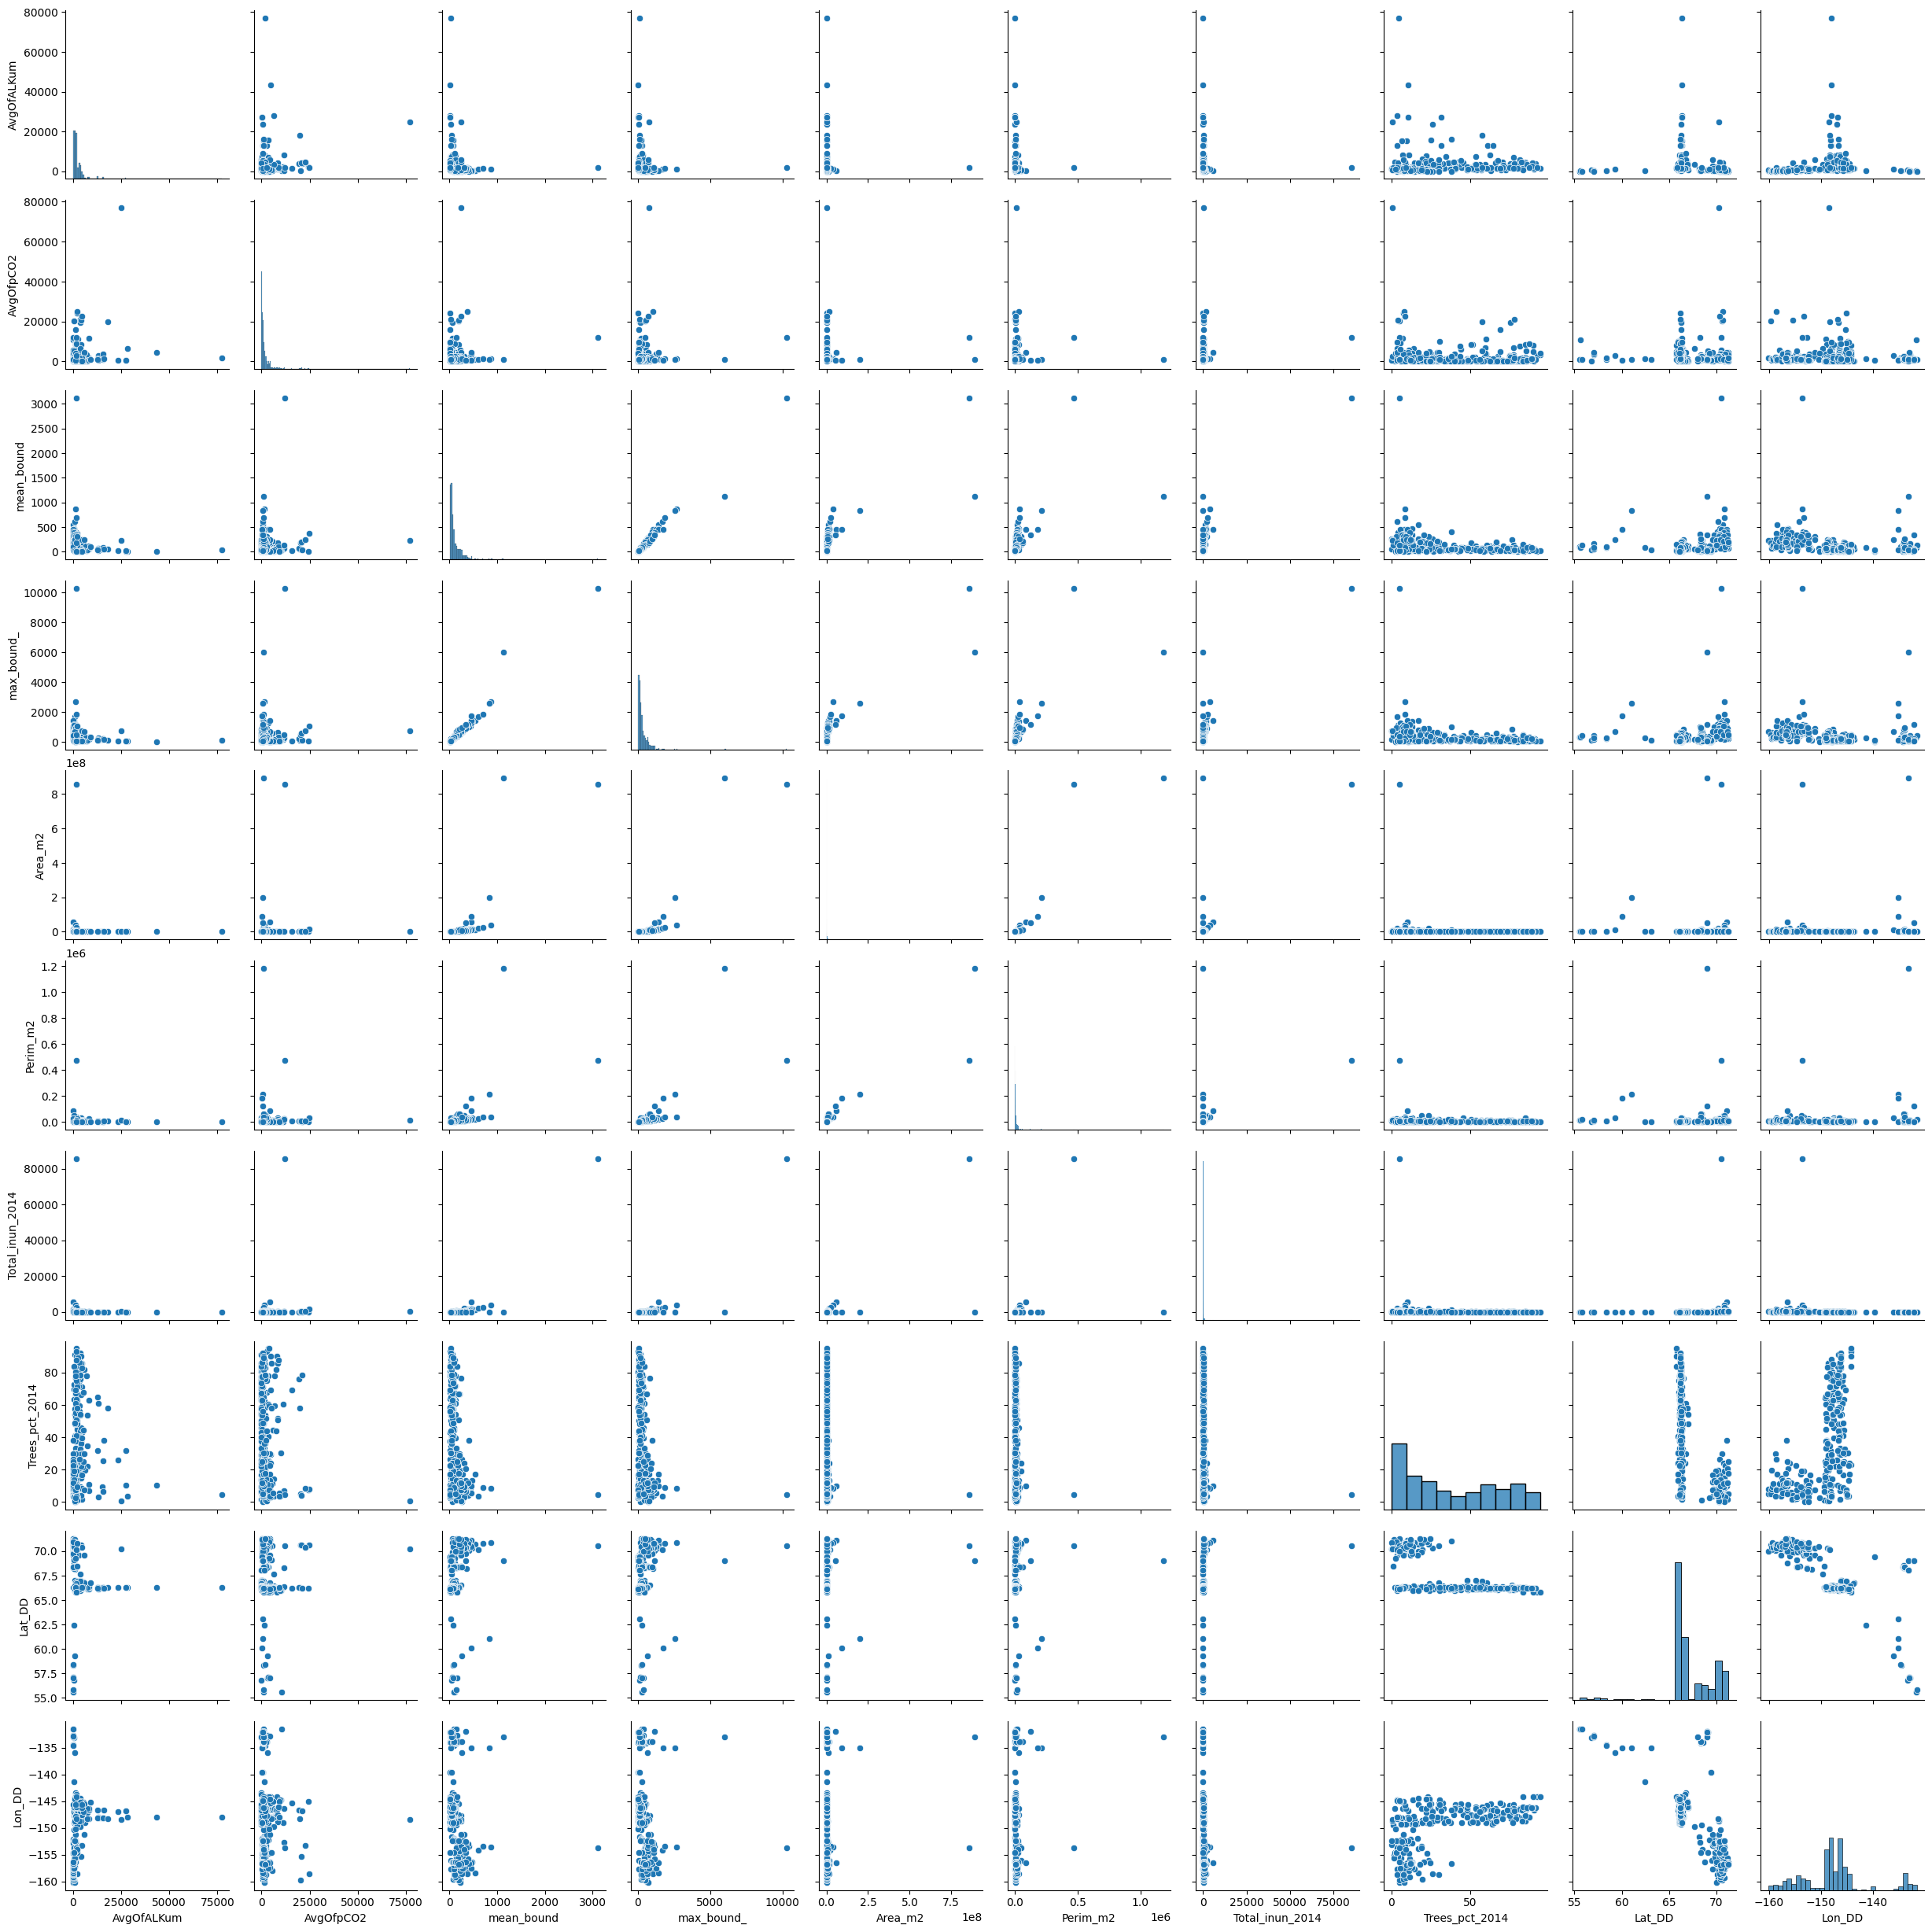

In [12]:
sns.pairplot(gdf[pco2_names + physical_names])

Plot By comparing one type of analysis to another

In [ ]:
# Figure out good xscale for plotting
# One outlier each for area and max boundary distance
gdf.lake_area_km2.sort_values()
gdf.max_bound_dist.sort_values()

19      14.227825
57      26.310784
45      26.707341
24      29.649964
33      36.480429
         ...     
84     626.917803
71     819.726499
72     853.527034
70     921.634089
49    1583.298039
Name: max_bound_dist, Length: 91, dtype: float64

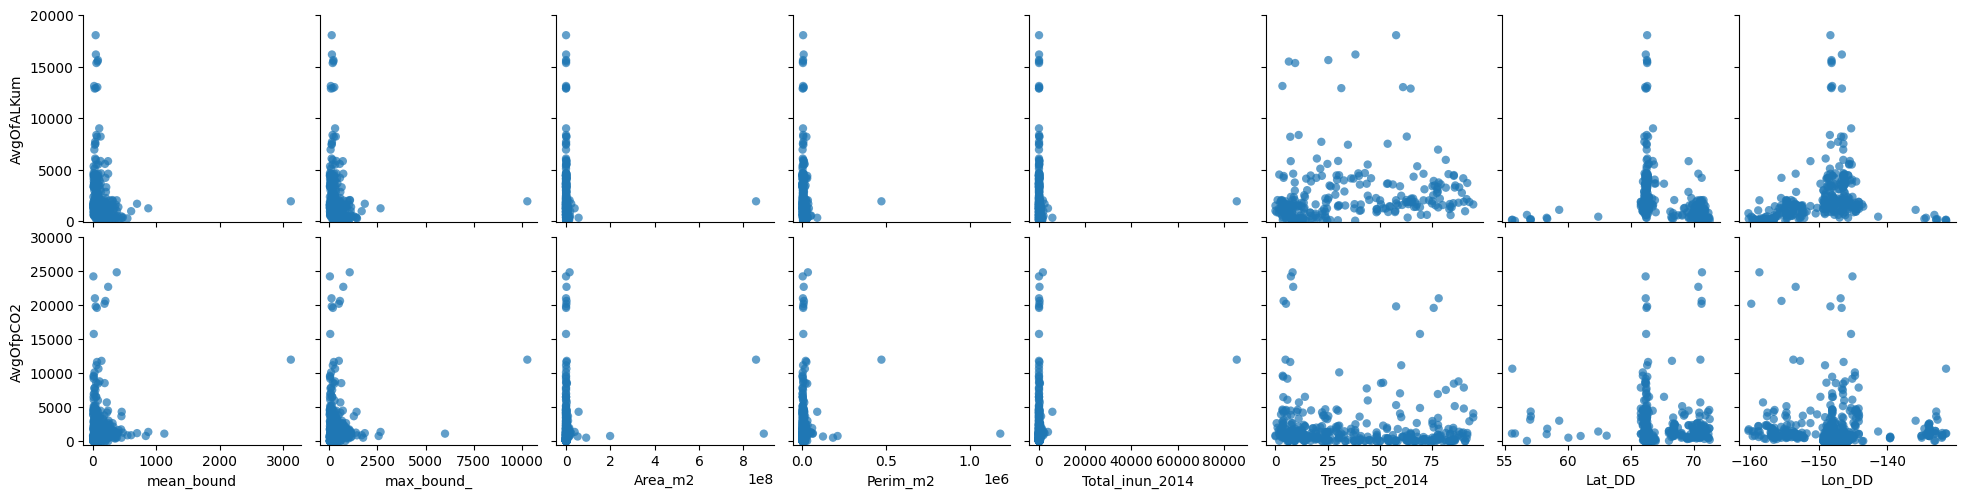

In [41]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=physical_names,
    plot_kws={"alpha": 0.7, "edgecolor": "none"},
    # hue="Region",
)
g.axes[0, -1].set_ylim([-100, 20000])  # one outlier hidden
g.axes[1, -1].set_ylim([-500, 30000])  # one outlier hidden
plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_morph.png"), dpi=400)

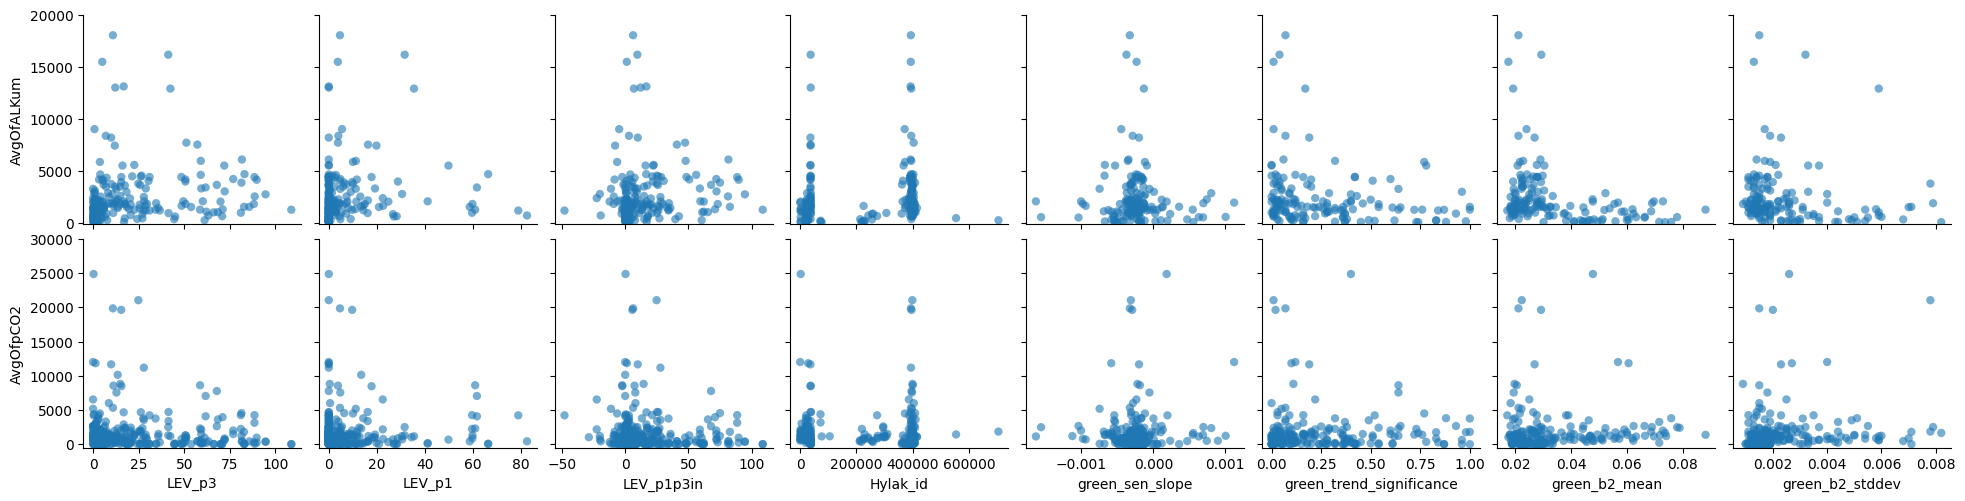

In [40]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    plot_kws={"alpha": 0.6, "edgecolor": "none"},
    # hue="Region",
)
g.axes[0, -1].set_ylim([-100, 20000])  # one outlier hidden
g.axes[1, -1].set_ylim([-500, 30000])  # one outlier hidden

plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_green.png"), dpi=400)

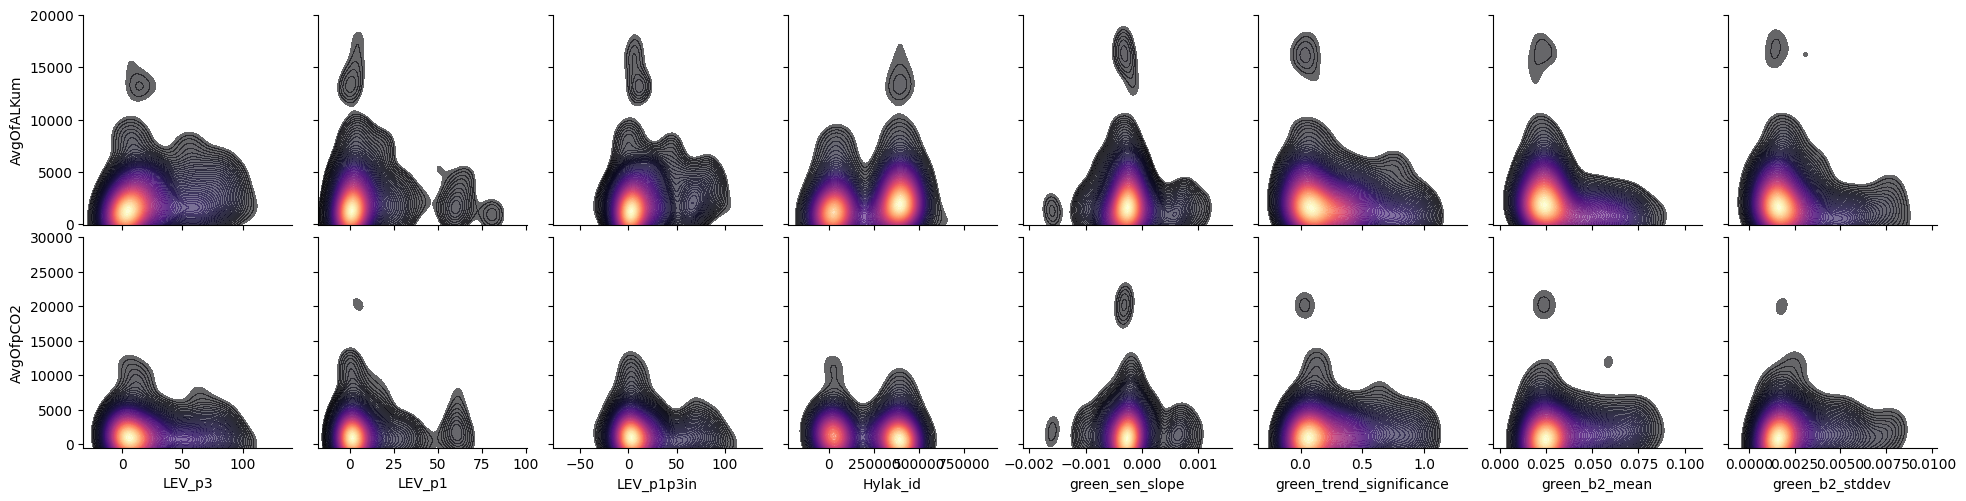

In [42]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    kind="kde",
    plot_kws={"fill": True, "thresh": 0.05, "levels": 100, "alpha": 0.6, "cmap":"magma"},
    # hue="Region",
)
g.axes[0, -1].set_ylim([-100, 20000])  # one outlier hidden
g.axes[1, -1].set_ylim([-500, 30000])  # one outlier hidden
plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_green_kde.png"), dpi=400)

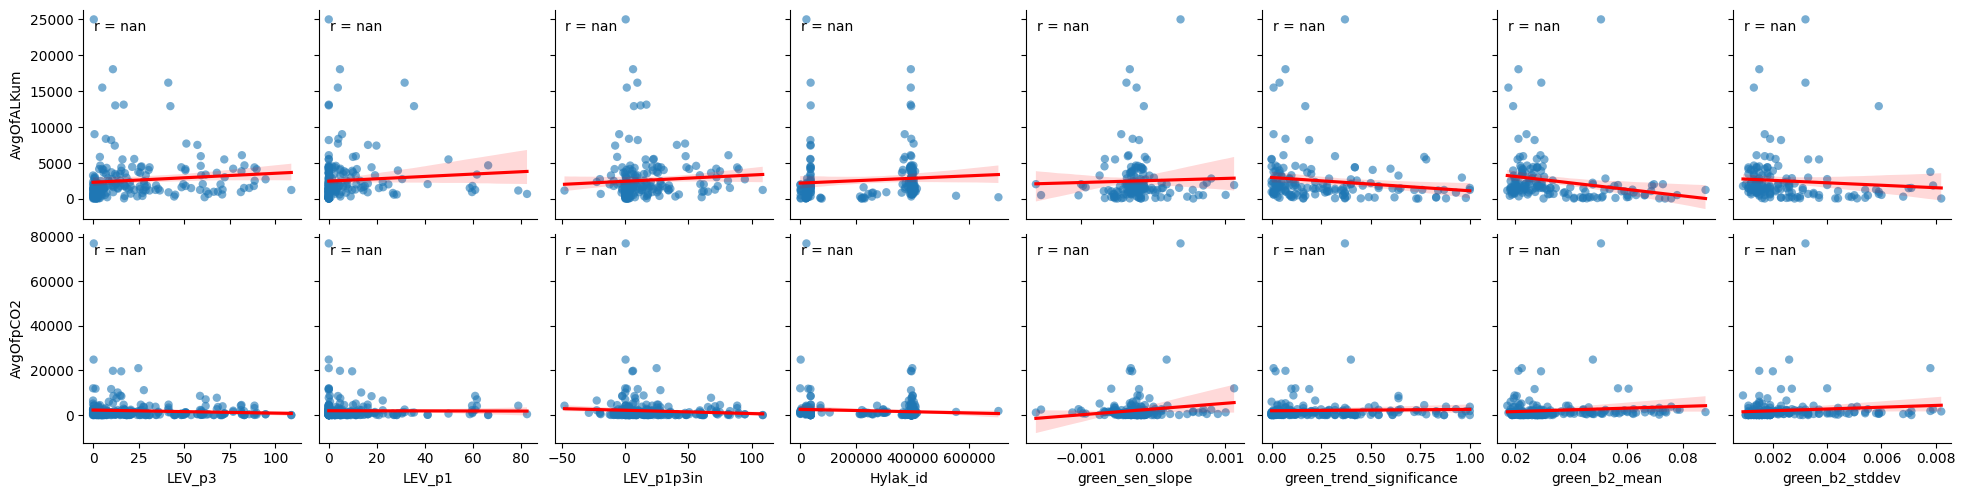

In [ ]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    kind="scatter",
    plot_kws={"alpha": 0.6, "edgecolor": "none"},
)

g.map(add_corr_line)
# g.axes[0, -1].set_ylim([-100, 20000])  # one outlier hidden
# g.axes[1, -1].set_ylim([-500, 30000])  # one outlier hidden

# TODO: rm nans to get r value, only plot if p < 0.1

## Green versus Max distance

(-50.0, 500.0)

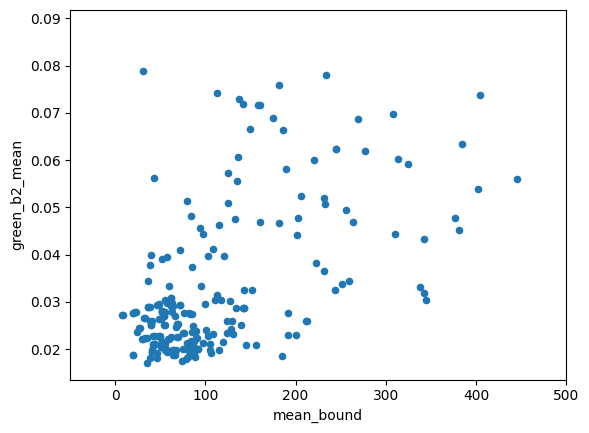

In [ ]:
gdf.green_b2_mean
gdf.plot.scatter(x="mean_bound", y="green_b2_mean")
plt.xlim([-50, 500]) # Three outliers is not shown

(-50.0, 500.0)

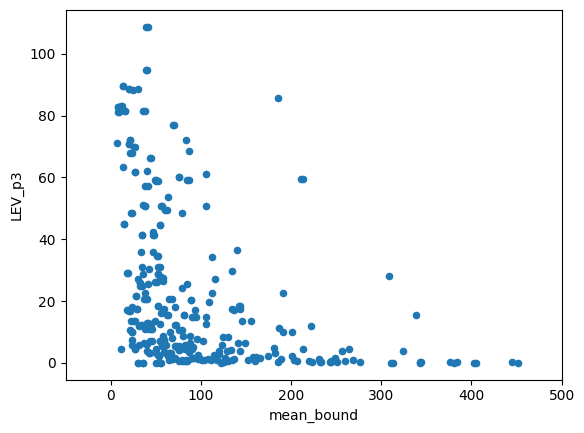

In [15]:
gdf.plot.scatter(x="mean_bound", y="LEV_p3")
plt.xlim([-50, 500])

Repeat with Seaborn

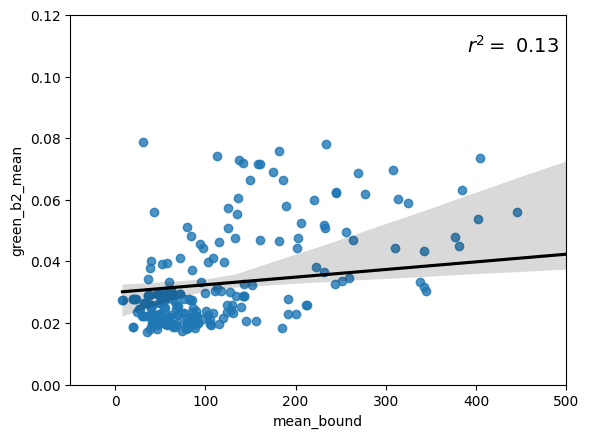

In [54]:
# g = sns.regplot(gdf, x="mean_bound", y="green_b2_mean")
sns.regplot(
    data=gdf, x="mean_bound", y="green_b2_mean", line_kws={"color": "black"}
)  # Change regression line color to black
plt.xlim([-50, 500])
plt.ylim([0, 0.12])
add_r2(x=gdf["mean_bound"], y=gdf["green_b2_mean"], xy=[0.8, 0.9], fontsize=14)

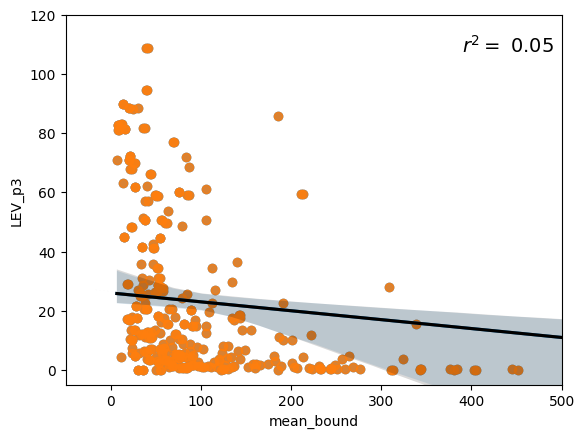

In [53]:
g = sns.regplot(gdf, x="mean_bound", y="LEV_p3")
sns.regplot(data=gdf, x="mean_bound", y="LEV_p3", line_kws={"color": "black"})  # Change regression line color to black
# plt.gca().set_aspect("auto")  # Ensure the axis is not equal aspect
plt.xlim([-50, 500])
plt.ylim([-5, 120])
add_r2(x=gdf["mean_bound"], y=gdf["LEV_p3"], xy=[0.8, 0.9], fontsize=14)

## Ternary plots

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_50120/1731415819.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('copper', len(quartiles) + 1)


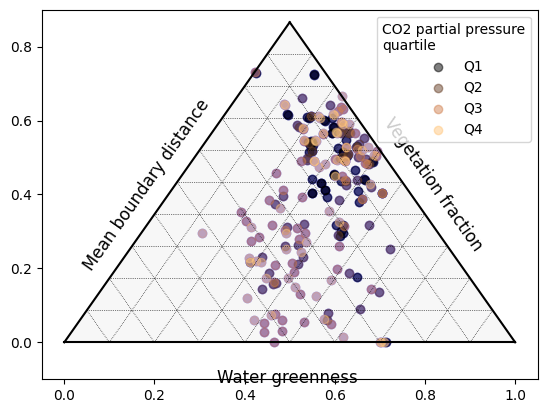

In [116]:
import ternary
from matplotlib import cm

# Select three variables for the ternary plot
# Save the variable names as strings
var1_name = "mean_bound"
var2_name = "LEV_p3"
var3_name = "green_b2_mean"
var4_name = "AvgOfpCO2"

gdf_dropped = gdf.dropna(subset=[var1_name, var2_name, var3_name, var4_name])
# Load the variables from gdf
var1 = np.log(gdf_dropped[var1_name] + 0.1)
var2 = np.log(gdf_dropped[var2_name] + 0.1)
var3 = np.log(gdf_dropped[var3_name] + 0.1)


normalized_data = np.vstack([var1, var2, var3]).T

normalized_data = (normalized_data - np.nanmin(normalized_data, axis=0, keepdims=True)) / (
    np.nanmax(normalized_data, axis=0, keepdims=True)
    - np.nanmin(normalized_data, axis=0, keepdims=True)
)
# Normalize the data to ensure the sum of the three variables equals 1 for each row
normalized_data = normalized_data / np.nansum(normalized_data, axis=1, keepdims=True)

# Create a ternary plot
figure, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(color="black", multiple=0.1)

# Plot the data
tax.scatter(normalized_data, marker='o', color='blue', alpha=0.5)

# Bin the data by quartiles of var4_name
quartiles = np.nanpercentile(gdf_dropped[var4_name], [25, 50, 75])
# Generate colors from the 'copper' colormap
cmap = cm.get_cmap('copper', len(quartiles) + 1)
colors = [cmap(i) for i in range(len(quartiles) + 1)]

# Assign a color to each point based on its quartile
for i, (low, high) in enumerate(zip([float('-inf')] + list(quartiles), list(quartiles) + [float('inf')])):
    mask = (gdf_dropped[var4_name] > low) & (gdf_dropped[var4_name] <= high)
    tax.scatter(normalized_data[mask], marker='o', color=colors[i], alpha=0.5, label=f'Q{i+1}')

# Add legend
tax.legend(title='CO2 partial pressure\nquartile')
# Add labels
tax.left_axis_label("Mean boundary distance", fontsize=12)
tax.right_axis_label("Vegetation fraction", fontsize=12)
tax.bottom_axis_label("Water greenness", fontsize=12)

# Show the plot
plt.show()
tax.savefig(os.path.join(plot_dir, "ternary_aleb.png"), dpi=400)

In [107]:
quartiles

array([ 197.74817151,  857.499542  , 1815.4927575 ])

In [96]:
np.nanmin(normalized_data, axis=0, keepdims=True)

array([[0., 0., 0.]])

In [94]:
gdf_dropped[var3_name]
# normalized_data.max()

12     0.02810
13     0.02510
17     0.02370
18     0.02490
19     0.03080
        ...   
452    0.04665
456    0.04690
461    0.03330
462    0.02890
463    0.03040
Name: green_b2_mean, Length: 219, dtype: float64

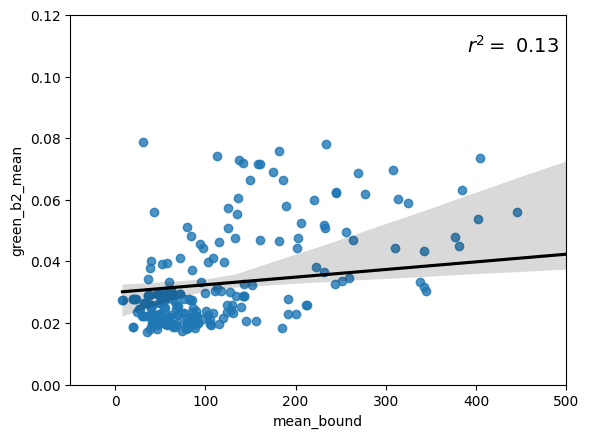

In [ ]:
# g = sns.regplot(gdf, x="mean_bound", y="green_b2_mean")
sns.regplot(
    data=gdf, x="mean_bound", y="green_b2_mean", line_kws={"color": "black"}
)  # Change regression line color to black
plt.xlim([-50, 500])
plt.ylim([0, 0.12])
add_r2(x=gdf["mean_bound"], y=gdf["green_b2_mean"], xy=[0.8, 0.9], fontsize=14)